
#     Travaux Patriques Python  
####    Mégane BOYER & Emeline Toustou

## EXERCICE 1: Le jeu de la vie

In [1]:

from utils import calcul_nb_voisins

Implémentation sans Numpy:
    
#Question 4: 


In [3]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

### Question 5 :
Dans cette question on se propose pour la liste Z ci-dessus d'a􏰇fficher les étapes du jeu de 0 à 9 itérations, en utilisant une boucle for:

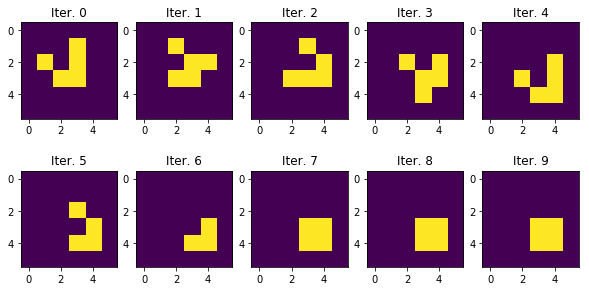

In [4]:
from utils import iteration_jeu    
import matplotlib.pyplot as plt
import numpy as np
    
    
plt.figure(figsize=(10,5))
Zbis = np.copy(Z)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.array(Zbis))
    Zbis = iteration_jeu(Zbis)
    plt.title("Iter. "+str(i))
    


### Question 6: 
Que remarquez-vous entre l'itération 0 et l'itération 4 ? Que se passe-t-il après l'itération 7 ?


Entre l'itération 0 et 4 on observe que les cellules évoluent. Le nombre de cellules vivantes est stable égal à 5. Les formes se répètent. En effet, on remarque que la disposition des cellules vivantes est similaire pour l'itération 0, 2, 4, mais décalé comme entre l'itération 0 et 4 où les cellules vivantes se sont toutes déplacées d'une cellule en bas et d'une cellule à droite, et parfois les cellules ont changé de sens comme dans l'itération 2. Il en est de même pour les itérations 1 et 3 ( même forme mais translaté).
A partir de l'itération 7, le jeu est stable et ne bougera donc plus. En effet, chaque cellule vivante possède 3 voisins et donc reste en équilibre à l'itération suivante, quant aux  cellules mortes,  elles n'ont au plus que 2 voisins, et donc ne peuvent pas naître. Il n'y aura aucune évolution dans les prochaines itérations.

## EXERCICE 2 : Regression Logistique

### Question 1: 

In [22]:
import sklearn
sklearn.__version__ 

'0.20.3'

In [6]:
from sklearn.datasets import fetch_openml
from random import randint

In [7]:
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64') #normalement il s'agit déjà de flottant dans cette version. 
y = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings.
#y = mnist.target


In [8]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

Autre façon:

In [12]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [78]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

### Question 2:
    
Transformer X et y pour ne garder que les cas des chi􏰀ffres 3 et 7:

In [50]:
classe_3 = np.array(y==3)
classe_7 = np.array(y==7)
classe_3_7 = classe_3 + classe_7  #On somme terme à terme pour ne garder que les cas des chiffres 3 et 7

X_3_7 = X[classe_3_7]
y_3_7 = y[classe_3_7]


Visualisons avec imshow un exemple de chaque classe d'image (un X donc), en utilisant un reshape adapté.

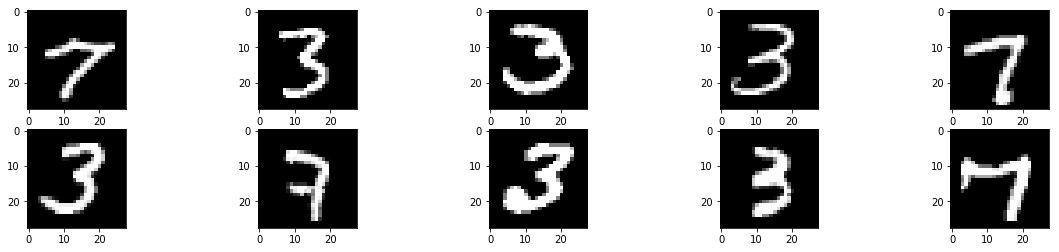

In [51]:
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    img = (X_3_7[randint(0,len(X_3_7)-1)].reshape((28,28)))
    plt.imshow(img, cmap=plt.cm.gray)

### Question 3:

Utilisons la fonction LogisticRegression pour apprendre un modèle de classi􏰅cafication sur l'intégralité des données. (on choisira un cas sans ordonnée à l'origine, i.e., l'option fit_intercept=False)

In [67]:
#from sklearn.linear_model import LogisticRegression
#logisticRegr = LogisticRegression(fit_intercept = False, solver='lbfgs')
#logisticRegr.fit(X_3_7, y_3_7)

from sklearn import linear_model
logisticRegr= linear_model.LogisticRegression(fit_intercept=False)
logisticRegr.fit(X_3_7, y_3_7)

/Users/meganeboyer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
logisticRegr.coef_.shape

(1, 784)

In [79]:
X_3_7.shape

(14434, 784)